<a href="https://colab.research.google.com/github/danielpp2002/CD_DANIEL_PENA/blob/main/Taller_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Máquinas de Soporte Vectorial** 


Las máquinas de soporte vectorial (SVM por sus siglas en inglés) son modelos de aprendizaje supervisado que pueden utilizarse para clasificar datos.

En el modelo SVM se construye un hiperplano en un espacio multidimensional para separar las diferentes clases. De forma iterativa se obtiene un hiperplano óptimo que minimice el error.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sb
import os
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

## Base de datos

Variable objetivo: Comprará

Variables explicativas:

Ingresos: Ingresos familiares mensuales

Gastos_ppal: Pagos de servicios públicos mensuales.

Gastos_transporte: Cuota de vehículos, los gastos en combustible, etc. al mes.

Otros_gastos: Compras en supermercado y lo necesario para vivir al mes.

ahorros: Total de ahorros disponibles para la compra de vivienda.

vivienda: Precio de la vivienda que se quiere comprar.

estado civil:
* 1: Soltero
* 2: Casado
* 3: Separado

hijos: Cantidad de hijos menores y/o que no trabajan.

trabajo:
* 0: sin empleo 
* 1: independiente (freelance)
* 2: empleado
* 3: empresario
* 4: pareja: independiente
* 5: pareja: empleados
* 6: pareja: independiente y asalariado
* 7: pareja: empresario e independiente
* 8: pareja: empresarios los dos o empresario y empleado

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/fmoreno4/datasets/main/comprar_alquilar_con_cate.csv')
df

,ingresos,gasto_ppal,vehiculo,otros_gastos,ahorros,Valor_vivienda,estado_civil,hijos,trabajo,comprara
0,6000,1000,0,600,50000,400000,Soltero,2,Tipo 2,Si
1,6745,944,123,429,43240,636897,Casado,3,Tipo 6,No
2,6455,1033,98,795,57463,321779,Separado,1,Tipo 8,Si
3,7098,1278,15,254,54506,660933,Soltero,0,Tipo 3,No
4,6167,863,223,520,41512,348932,Soltero,0,Tipo 3,Si
...,...,...,...,...,...,...,...,...,...,...
197,3831,690,352,488,10723,363120,Soltero,0,Tipo 2,No
198,3961,1030,270,475,21880,280421,Separado,3,Tipo 8,No
199,3184,955,276,684,35565,388025,Casado,3,Tipo 8,No
200,3334,867,369,652,19985,376892,Casado,2,Tipo 5,No


In [ ]:
df.dtypes

ingresos           int64
gasto_ppal         int64
vehiculo           int64
otros_gastos       int64
ahorros            int64
Valor_vivienda     int64
estado_civil      object
hijos              int64
trabajo           object
comprara          object
dtype: object

In [ ]:
df.isnull().sum()

ingresos          0
gasto_ppal        0
vehiculo          0
otros_gastos      0
ahorros           0
Valor_vivienda    0
estado_civil      0
hijos             0
trabajo           0
comprara          0
dtype: int64

In [ ]:
df.groupby(['trabajo']).count()

,ingresos,gasto_ppal,vehiculo,otros_gastos,ahorros,Valor_vivienda,estado_civil,hijos,comprara
trabajo,,,,,,,,,
Tipo 0,16,16,16,16,16,16,16,16,16
Tipo 1,18,18,18,18,18,18,18,18,18
Tipo 2,18,18,18,18,18,18,18,18,18
Tipo 3,21,21,21,21,21,21,21,21,21
Tipo 4,19,19,19,19,19,19,19,19,19
Tipo 5,31,31,31,31,31,31,31,31,31
Tipo 6,23,23,23,23,23,23,23,23,23
Tipo 7,27,27,27,27,27,27,27,27,27
Tipo 8,29,29,29,29,29,29,29,29,29


In [ ]:
#Transformación de datos
mapa1 = { 'Soltero': 1, 'Casado': 2, 'Separado': 3}
df['estado_civil'] = df['estado_civil'].map(mapa1)

mapa2 = { 'Tipo 0': 0, 'Tipo 1': 1, 'Tipo 2': 2, 'Tipo 3': 3, 'Tipo 4': 4, 'Tipo 5': 5, 'Tipo 6': 6, 'Tipo 7': 7,'Tipo 8': 8}
df['trabajo'] = df['trabajo'].map(mapa2)

df

,ingresos,gasto_ppal,vehiculo,otros_gastos,ahorros,Valor_vivienda,estado_civil,hijos,trabajo,comprara
0,6000,1000,0,600,50000,400000,1,2,2,Si
1,6745,944,123,429,43240,636897,2,3,6,No
2,6455,1033,98,795,57463,321779,3,1,8,Si
3,7098,1278,15,254,54506,660933,1,0,3,No
4,6167,863,223,520,41512,348932,1,0,3,Si
...,...,...,...,...,...,...,...,...,...,...
197,3831,690,352,488,10723,363120,1,0,2,No
198,3961,1030,270,475,21880,280421,3,3,8,No
199,3184,955,276,684,35565,388025,2,3,8,No
200,3334,867,369,652,19985,376892,2,2,5,No


In [ ]:
#Selección de variables
predictores = df[['ingresos','gasto_ppal','vehiculo','otros_gastos','ahorros','Valor_vivienda','estado_civil','hijos','trabajo']]
objetivo = df.comprara

In [ ]:
#Partición para validación cruzada
pred_train, pred_test, res_train, res_test = train_test_split(predictores, objetivo, test_size=0.2)

# **Modelo SVM**

**Funciones de Kernel:** lineal (*linear*), polinómica (*poly*), sigmoide (*sigmoid*), de base radial (*rbf*).

**Gamma:** Valor escalar que define que tanta influencia tiene un registro individual (punto).

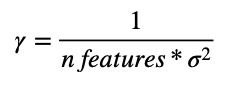

In [ ]:
#Modelo SVM
SVM_Model = SVC(gamma='auto', kernel='rbf')
SVM_Model.fit(pred_train, res_train)

SVC(gamma='auto')

In [ ]:
print (f'Precisión: {SVM_Model.score(pred_test, res_test):.4f}')

Precisión: 0.5610


Hacer lo mismo con los datos del titanic, vivio o murio, sacar la precision y la echaustividad

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/adiacla/bigdata/master/titanic.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
df = df.drop('Cabin', axis = 1)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [ ]:
df = df.dropna()
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [ ]:
df["Sex2"] = 0
df.Sex2.loc[df.Sex=="female"] = 1
df.Sex2.loc[df.Sex=="male"] = 0
df

<ipython-input-20-8d0d7571fd9b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Sex2"] = 0
<ipython-input-20-8d0d7571fd9b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Sex2.loc[df.Sex=="female"] = 1
<ipython-input-20-8d0d7571fd9b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Sex2.loc[df.Sex=="male"] = 0


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Sex2
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,Q,1
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,0


In [ ]:
df["Embarked2"] = 0
df.Embarked2.loc[df.Embarked=="C"] = 0
df.Embarked2.loc[df.Embarked=="Q"] = 1
df.Embarked2.loc[df.Embarked=="S"] = 2
df

<ipython-input-21-fac68ea6f1f9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Embarked2"] = 0
<ipython-input-21-fac68ea6f1f9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Embarked2.loc[df.Embarked=="C"] = 0
<ipython-input-21-fac68ea6f1f9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Embarked2.loc[df.Embarked=="Q"] = 1
<ipython-input-21-fac68ea6f1f9>:4: Settin

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Sex2,Embarked2
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,Q,1,1
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,0,2
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,1,2
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,0,0


In [ ]:
df["Ninos"] = 0
df.Ninos.loc[df.Age<12] = 1
df.Ninos.loc[df.Age>=12] = 0
df

<ipython-input-22-43238c0d332c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Ninos"] = 0
<ipython-input-22-43238c0d332c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Ninos.loc[df.Age<12] = 1
<ipython-input-22-43238c0d332c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Ninos.loc[df.Age>=12] = 0


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Sex2,Embarked2,Ninos
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,2,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,2,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,Q,1,1,0
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,0,2,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,1,2,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          712 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Embarked     712 non-null    object 
 11  Sex2         712 non-null    int64  
 12  Embarked2    712 non-null    int64  
 13  Ninos        712 non-null    int64  
dtypes: float64(2), int64(8), object(4)
memory usage: 83.4+ KB


In [ ]:
#Selección de variables
predictores = df[['Pclass','Sex2','Age','SibSp','Parch','Fare','Embarked2']]
objetivo = df.Survived

In [ ]:
#Partición para validación cruzada
pred_train, pred_test, res_train, res_test = train_test_split(predictores, objetivo, test_size=0.2)

In [ ]:
#Modelo SVM
SVM_Model = SVC(gamma='auto', kernel='rbf')
SVM_Model.fit(pred_train, res_train)

SVC(gamma='auto')

In [ ]:
from sklearn.metrics import recall_score

In [ ]:
print (f'Precisión: {SVM_Model.score(pred_test, res_test):.4f}')
print(f'Exhaustividad: {recall_score(res_test, SVM_Model.predict(pred_test), average="macro"):.4f}')

Precisión: 0.6783
Exhaustividad: 0.6606
